Handwritten Digit Recognition using CNN on MNIST Dataset

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.8643 - loss: 0.4480 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9800 - loss: 0.0659 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9855 - loss: 0.0475 - val_accuracy: 0.9905 - val_loss: 0.0359
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9907 - val_loss: 0.0339
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9888 - val_loss: 0.0379


In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9854 - loss: 0.0443
Test Accuracy: 98.76%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


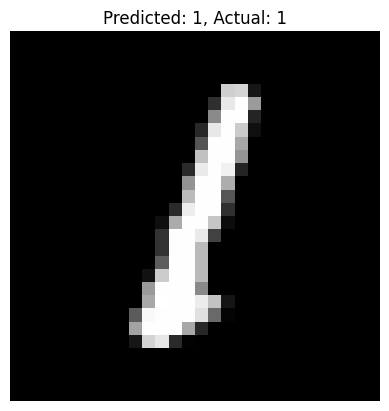

In [6]:
# Predict and visualize one sample
import random
index = random.randint(0, len(x_test))
img = x_test[index]
true_label = np.argmax(y_test[index])
prediction = model.predict(img.reshape(1,28,28,1))
predicted_label = np.argmax(prediction)
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {true_label}')
plt.axis('off')
plt.show()

In [7]:
# Save the model
model.save('mnist_cnn_model.keras')